# Dohyun Kang's visualization project

- Hello, this is Dohyun Kang's visualization project using Jupyter Notebook, conducted on February, 2023
- This analysis is created solely for Dohyun kang's project to demonstrate an ability to visualize data via codes.
- If you want to see all codes about this project, please go to Stock_data.ipynb file
- All data is collected based on Yahoo Finance on Jan 31, 2023.
- The project contains a glimpse into three stocks.
- The project may contains brief analysis of stocks based on chart 

## TSLA, TM, GM Stock Brief Comparison
- Since TM(Toyota Motors) is publicly traded stock in Japan, I converted currency of JPY to USD based on Jan 31, 2023 exchange rate 
-Stock ticker
  - TSLA = Tesla
  - TM = Toyota Motoss
  - GM = General Motors


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['figure.figsize']=(6, 4)

In [2]:
df = pd.read_excel('STOCK.xlsx')
df

,STOCK,PRICE,REVENUE19(B),REVENUE20(B),REVENUE21(B),REVENUE_TTM(B),3YEAREXP(B),EPS_TTM,MARKETCAP(B),OUTSTANDINGSHARES(B)
0,TSLA,173.22,24.58,31.53,53.82,74.86,85.6,3.03,506.09,3.16
1,TM,146.67,232.42,230.14,209.26,258.42,541.3,13.97,200.49,1.36
2,GM,39.32,137.24,122.49,127.00,147.21,341.2,5.62,51.83,1.42


## Revenue part

In [3]:
#using iloc to bring data and save data as a list
x = ['2019', '2020', '2021', 'TTM']
color = ['#AA104F', '#FF0000', '#1c549e']
TESLA = [df.iloc[0, [2]], df.iloc[0, [3]], df.iloc[0, [4]], df.iloc[0, [5]]]
Toyota = [df.iloc[1, [2]], df.iloc[1, [3]], df.iloc[1, [4]], df.iloc[1, [5]]]
GM = [df.iloc[2, [2]], df.iloc[2, [3]], df.iloc[2, [4]], df.iloc[2, [5]]]

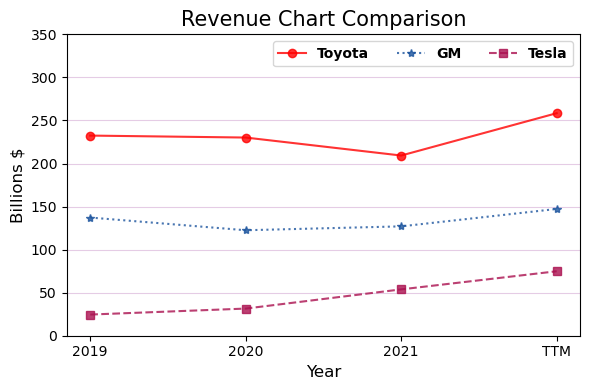

In [4]:
#draw data based on data above
plt.title('Revenue Chart Comparison', fontsize=15)


plt.plot(x, Toyota, label = 'Toyota', marker = 'o', color = color[1], alpha=0.8)
plt.plot(x, GM, label = 'GM', marker='*', color = color[2], linestyle = ':', alpha=0.8)
plt.plot(x, TESLA, label ='Tesla', marker='s', color = color[0], linestyle = '--', alpha=0.8)
plt.ylabel(ylabel = 'Billions $', loc ='center', fontsize = 12)
plt.xlabel(xlabel = 'Year', loc = 'center', fontsize = 12)
plt.legend(ncol=3, prop = {"weight" :'bold'})  
plt.ylim(0, 350)
plt.grid(axis = 'y', color = 'purple', alpha =0.2)
plt.tight_layout()
#plt.savefig('TTG_Revenue_plot.png', dpi=100)
plt.show()


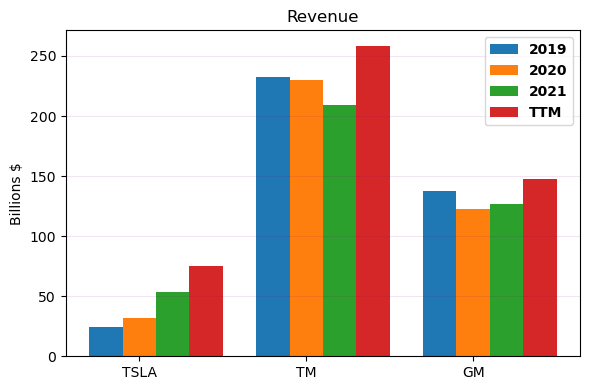

In [5]:
#multiple bar chart example
N = df.shape[0]
index =np.arange(N)
w = 0.2 

plt.title('Revenue')
#set index-w, index, index+w, to manage bar location per company
plt.bar(index -w , df['REVENUE19(B)'], width=w, label = '2019')
plt.bar(index, df['REVENUE20(B)'], width=w, label = '2020')
plt.bar(index+w, df['REVENUE21(B)'], width=w, label = '2021')
plt.bar(index+w+0.2, df['REVENUE_TTM(B)'], width=w, label = 'TTM')
plt.legend(prop = {"weight" :'bold'})
#add stock name at the x-axis
plt.xticks(index, df['STOCK'], rotation=0)
plt.grid(axis = 'y', color = 'purple', alpha = 0.1)
plt.ylabel('Billions $', color = 'black', loc ='center')
plt.tight_layout()
#plt.savefig('TTG_Revenue_bar.png', dpi=100)
plt.show()

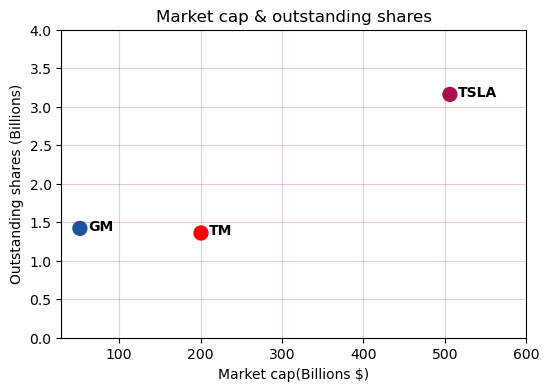

In [6]:

# name = df['STOCK']
# value = df['MARKETCAP(B)']
# plt.figure(figsize=(10, 5))
# plt.title('MARKET CAP')
# plt.barh(name, value, 0.4, color = 'green', align='center')
# for i,v in enumerate(value):
#     plt.text(v, i, str(v), color='black', fontweight='bold')
# plt.xlabel('Billions', color = 'black', loc = 'right')
# plt.show()

plt.title('Market cap & outstanding shares')
plt.scatter(df['MARKETCAP(B)'], df['OUTSTANDINGSHARES(B)'], s= 100, marker = 'o', color = color)
for i in range(0, df.shape[0]):
    #location of xaxis, yaxis, and letter 
     plt.text(df['MARKETCAP(B)'][i] + 10, df['OUTSTANDINGSHARES(B)'][i]- 0.02, str(df['STOCK'][i]),color='black', weight = 'semibold')
plt.ylabel('Outstanding shares (Billions)')
plt.xlabel('Market cap(Billions $)')

limit = [0]
value = 0
#setting y lim by iteration
for x in range(8):
    value += 0.5
    limit.append(value)
plt.yticks(limit)
plt.grid(color = 'purple', alpha = 0.2)
plt.xticks([100, 200, 300, 400, 500, 600])
#plt.savefig('TTG_MCOS.png', dpi=100)
plt.show()


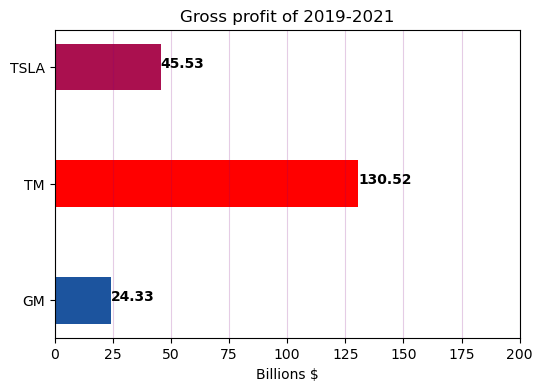

In [7]:

#calculate EBIDA through iteration
#draw barh chart with data
name = df['STOCK'][::-1]
EBITDA = []
for i in range(3):
    n = df.iloc[i,2] + df.iloc[i,3] + df.iloc[i,4] - df.iloc[i,6]
    EBITDA.append(round(n, 2))

plt.title('Gross profit of 2019-2021')
plt.barh(name, EBITDA, 0.4, color = color[::-1] , align='center')
for i,v in enumerate(EBITDA):
    plt.text(v, i, str(v), color='black', fontweight='bold', )
plt.xlabel('Billions $', color = 'black', loc = 'center')
plt.xlim(0, 200)
plt.grid(axis = 'x', color = 'purple', alpha = 0.2)

#plt.savefig('TTG_Ebitda.png', dpi=100)
plt.show()

##EBITA (EARNINGS BEFORE interest, Taxes, Depreciation and Amortization)

This data is calculated by adding 3years revenues(2019, 2020, 2021) minus 3years operating expenses.
THis chart shows basic profit of the company.

based on the chart, TOYOTA MOTORS profit level is highest, followed by GENERAL MOTORS AND TESLA.

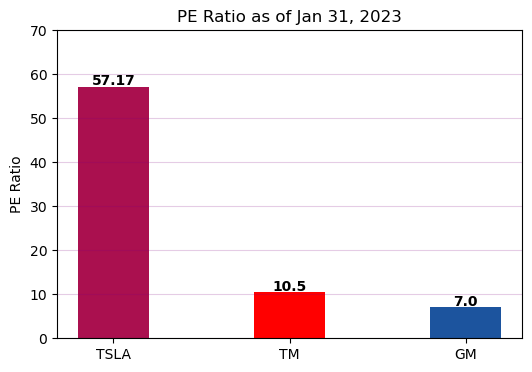

In [8]:
#calculate PE_ration of each one.
PE_ratio = round(df["PRICE"] / df["EPS_TTM"], 2)
w = 0.4

bar = plt.bar(df["STOCK"], PE_ratio, width=w, color = color)
for idx, rect in enumerate(bar):
    plt.text(df["STOCK"][idx], PE_ratio[idx]+ 0.3, PE_ratio[idx], ha='center', color = 'black', fontweight = 'bold')
plt.ylim(0,70)
plt.grid(axis = 'y', color = 'purple', alpha = 0.2)
plt.ylabel(ylabel = 'PE Ratio')
plt.title("PE Ratio as of Jan 31, 2023")
#plt.savefig('PE_Ratio.png', dpi=100)
plt.show()

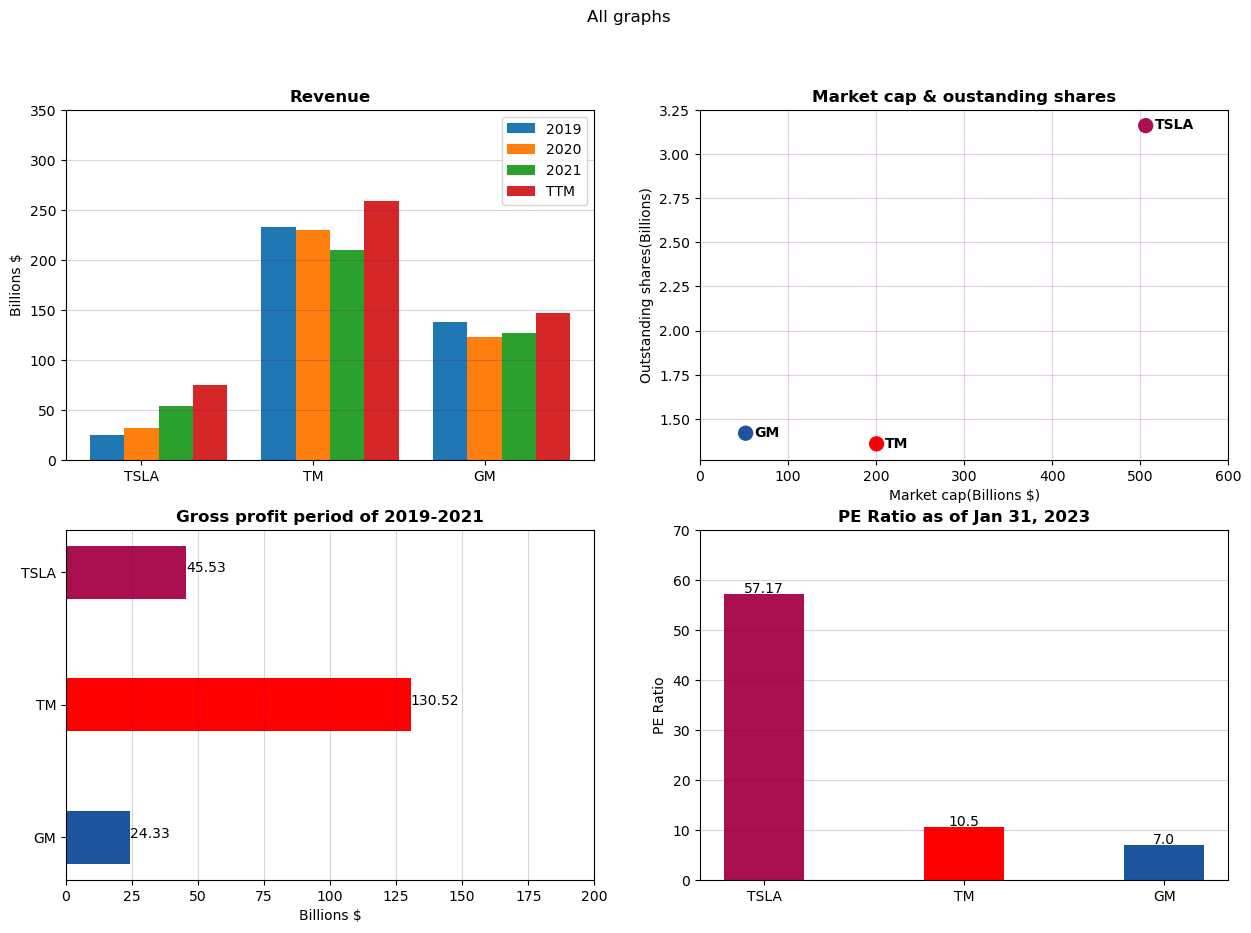

In [9]:
#draw multiple chart so that it is easier to grasp stock's situation
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
fig.suptitle('All graphs')

#first
N = df.shape[0]
index =np.arange(N)
w = 0.2 
axs[0,0].set_title('Revenue', fontweight = 'bold')
axs[0,0].bar(index -w , df['REVENUE19(B)'], width=w, label = '2019')
axs[0,0].bar(index, df['REVENUE20(B)'], width=w, label = '2020')
axs[0,0].bar(index+w, df['REVENUE21(B)'], width=w, label = '2021')
axs[0,0].bar(index+w+0.2, df['REVENUE_TTM(B)'], width=w, label = 'TTM')
axs[0,0].legend()
axs[0,0].set_xticks(index, df['STOCK'], rotation=0)
axs[0,0].grid(axis = 'y', color = 'purple', alpha = 0.1)
axs[0,0].set_ylabel('Billions $', color = 'black', loc ='center')
axs[0,0].set_ylim(0, 350)
axs[0,0].grid(axis = 'y', color = 'purple', alpha = 0.2)

#second

axs[0,1].set_title('Market cap & oustanding shares', fontweight = 'bold')
axs[0,1].scatter(df['MARKETCAP(B)'], df['OUTSTANDINGSHARES(B)'], s= 100, marker = 'o', color = color)
for i in range(0, df.shape[0]):
     axs[0,1].text(df['MARKETCAP(B)'][i] + 10, df['OUTSTANDINGSHARES(B)'][i]- 0.02, str(df['STOCK'][i]),color='black', weight = 'semibold')
axs[0,1].set_ylabel('Outstanding shares(Billions)')
axs[0,1].set_xlabel('Market cap(Billions $)')
axs[0,1].set_xlim(0, 600)
axs[0,1].grid(color = 'purple', alpha = 0.2)

#third

name = df['STOCK'][::-1]
gp = []
for i in range(3):
    n = df.iloc[i,2] + df.iloc[i,3] + df.iloc[i,4] - df.iloc[i,6]
    gp.append(round(n, 2))
axs[1,0].set_title('Gross profit period of 2019-2021', fontweight = 'bold')
axs[1,0].barh(name, gp, 0.4, color = color[::-1], align='center')
for i,v in enumerate(gp):
    axs[1,0].text(v, i, str(v), color='black' )
axs[1,0].set_xlabel('Billions $', color = 'black', loc = 'center')
axs[1,0].set_xlim(0, 200)
axs[1,0].grid(axis = 'x', color = 'purple', alpha = 0.2)

#forth
PE_ratio = round(df["PRICE"] / df["EPS_TTM"], 2)
w = 0.4
axs[1,1].set_title('PE Ratio as of Jan 31, 2023', fontweight = 'bold')
axs[1,1].bar = plt.bar(df["STOCK"], PE_ratio, width=w, color = color)
axs[1,1].set_ylim(0, 70)
axs[1,1].set_ylabel('PE Ratio')
for idx, rect in enumerate(bar):
    axs[1,1].text(df["STOCK"][idx], PE_ratio[idx]+ 0.3, PE_ratio[idx], ha='center', color = 'black')
axs[1,1].grid(axis = 'y', color = 'purple', alpha = 0.2)
    
#fig.savefig("Summary.png", dpi = 100)